In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from pathlib import Path 

#Display settings 
pd.set_option("display.max_columns", None) 
pd.set_option("display.float_format", lambda x: f"{x:,.3f}")
sns.set_theme(style = "whitegrid", palette = "deep") 

# File Path 
DATA_PATH = Path("C:/Users/Medha/Projects/loan-eligibility-prediction/data/processed/engineered_loan_dataset.csv") 

DATA_PATH 


WindowsPath('C:/Users/Medha/Projects/loan-eligibility-prediction/data/processed/engineered_loan_dataset.csv')

In [2]:
#Sampling controls for EDA 
CHUNK_SIZE = 100_000    #How many rows to read at a time 
MAX_ROWS = 200_000      #Target total sample size (tune this if needed) 
RANDOM_STATE = 42 

if not DATA_PATH.exists(): 
    raise FileNotFoundError(f"Dataset not found as {DATA_PATH}")

print(f"Loading a random sample (up to {MAX_ROWS:,} rows) from :\n{DATA_PATH}")

samples = []
rows_collected = 0 

#Iterate over the file in chunks
for chunk in pd.read_csv(DATA_PATH, chunksize = CHUNK_SIZE, low_memory = False): 
    #how many more rows do we still want? 
    remaining = MAX_ROWS - rows_collected 
    if remaining <= 0: 
        break 

    #sample fraction from this chunk 
    frac = min(1.0, remaining / len(chunk)) 
    if frac <= 0: 
        break 

    samples.append(
        chunk.sample(frac = frac, random_state = RANDOM_STATE) 
    ) 
    rows_collected += len(samples[-1])

    print(f" Collected{rows_collected:,} rows so far...") 

#Combine all sampled chunks 
df = pd.concat(samples, ignore_index = True) 
print(f"\n Final EDA sample shape: {df.shape}") 

df.head()

Loading a random sample (up to 200,000 rows) from :
C:\Users\Medha\Projects\loan-eligibility-prediction\data\processed\engineered_loan_dataset.csv
 Collected100,000 rows so far...
 Collected200,000 rows so far...

 Final EDA sample shape: (200000, 95)


,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,fico_range_high,fico_range_low,inq_last_6mths,term_months,emp_length_years,fico_score,term_36 months,term_60 months,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_any,home_ownership_mortgage,home_ownership_own,home_ownership_rent,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_ak,addr_state_al,addr_state_ar,addr_state_az,addr_state_ca,addr_state_co,addr_state_ct,addr_state_dc,addr_state_de,addr_state_fl,addr_state_ga,addr_state_hi,addr_state_id,addr_state_il,addr_state_in,addr_state_ks,addr_state_ky,addr_state_la,addr_state_ma,addr_state_md,addr_state_me,addr_state_mi,addr_state_mn,addr_state_mo,addr_state_ms,addr_state_mt,addr_state_nc,addr_state_nd,addr_state_ne,addr_state_nh,addr_state_nj,addr_state_nm,addr_state_nv,addr_state_ny,addr_state_oh,addr_state_ok,addr_state_or,addr_state_pa,addr_state_ri,addr_state_sc,addr_state_sd,addr_state_tn,addr_state_tx,addr_state_ut,addr_state_va,addr_state_vt,addr_state_wa,addr_state_wi,addr_state_wv,addr_state_wy,application_type_individual,application_type_joint app,loan_status
0,"14,400.000",16.550,"45,204.000",27.420,0.000,684.000,680.000,0.000,60.000,3.000,682.000,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,1
1,"30,000.000",12.690,"131,000.000",33.800,0.000,689.000,685.000,0.000,60.000,2.000,687.000,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,1
2,"6,000.000",15.410,"35,000.000",35.670,1.000,669.000,665.000,0.000,36.000,1.000,667.000,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,1
3,"22,000.000",13.670,"133,000.000",15.820,0.000,739.000,735.000,2.000,36.000,3.000,737.000,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,1
4,"35,000.000",13.330,"120,000.000",8.280,2.000,734.000,730.000,0.000,60.000,10.000,732.000,False,True,False,True,False,False,False,False,False,False,False,False,False,F

In [3]:
#Basic Overview
print("🔍 Data Info:")
df.info(show_counts=True)
print("📌 First 5 rows:")
df.head()
print("📊 Summary statistics:")
df.describe().T


🔍 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 95 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    200000 non-null  float64
 1   int_rate                     200000 non-null  float64
 2   annual_inc                   200000 non-null  float64
 3   dti                          200000 non-null  float64
 4   delinq_2yrs                  200000 non-null  float64
 5   fico_range_high              200000 non-null  float64
 6   fico_range_low               200000 non-null  float64
 7   inq_last_6mths               200000 non-null  float64
 8   term_months                  200000 non-null  float64
 9   emp_length_years             200000 non-null  float64
 10  fico_score                   200000 non-null  float64
 11  term_36 months               200000 non-null  bool   
 12  term_60 months               200000 non-null 

,count,mean,std,min,25%,50%,75%,max
loan_amnt,"200,000.000","15,278.156","8,651.134","1,000.000","8,500.000","14,000.000","20,000.000","35,000.000"
int_rate,"200,000.000",12.362,4.242,5.320,9.170,12.290,14.650,28.990
annual_inc,"200,000.000","78,150.806","80,513.622",0.000,"47,575.500","65,000.000","93,400.000","9,000,000.000"
dti,"200,000.000",19.164,9.158,0.000,12.540,18.610,25.410,999.000
delinq_2yrs,"200,000.000",0.346,0.915,0.000,0.000,0.000,0.000,30.000
fico_range_high,"200,000.000",698.601,30.769,664.000,674.000,689.000,714.000,850.000
fico_range_low,"200,000.000",694.601,30.769,660.000,670.000,685.000,710.000,845.000
inq_last_6mths,"200,000.000",0.571,0.866,0.000,0.000,0.000,1.000,5.000
term_months,"200,000.000",43.843,11.257,36.000,36.000,36.000,60.000,60.000
emp_length_years,"200,000.000",6.017,3.613,0.000,3.000,6.000,10.000,10.000


In [4]:
#Identify Numeric & Categorical Columns 

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include =["object", "category"]).columns.tolist() 

print("Numeric columns:", len(numeric_cols))
print(numeric_cols[:20], "....") 


print("\nCategorical columns:", len(categorical_cols)) 
print(categorical_cols[:20], "....") 

Numeric columns: 12
['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_high', 'fico_range_low', 'inq_last_6mths', 'term_months', 'emp_length_years', 'fico_score', 'loan_status'] ....

Categorical columns: 0
[] ....


In [5]:
#Missing Value Audit 

missing = df.isna().sum().sort_values(ascending=False) 
missing_pct = (missing / len(df)) * 100 

missing_df = pd.DataFrame({
    "missing_count" : missing, 
    "missing_pct" : missing_pct
}) 

missing_df[missing_df["missing_count"] > 0].head(20) 


,missing_count,missing_pct


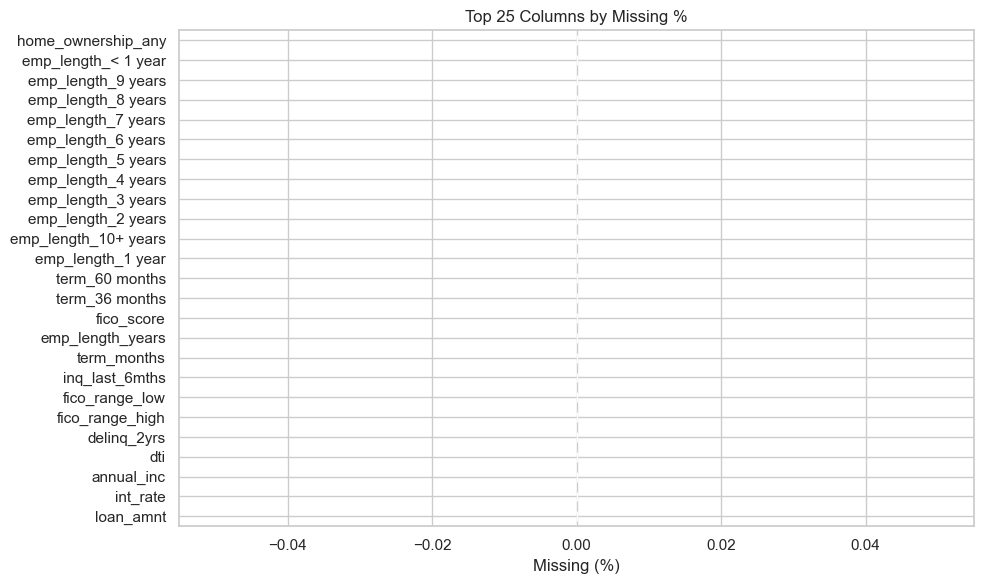

In [6]:
#Missing Value PLot
plt.figure(figsize = (10,6)) 
missing_df.head(25)["missing_pct"].sort_values().plot(kind = "barh") 
plt.title("Top 25 Columns by Missing %") 
plt.xlabel("Missing (%)") 
plt.tight_layout()
plt.show()

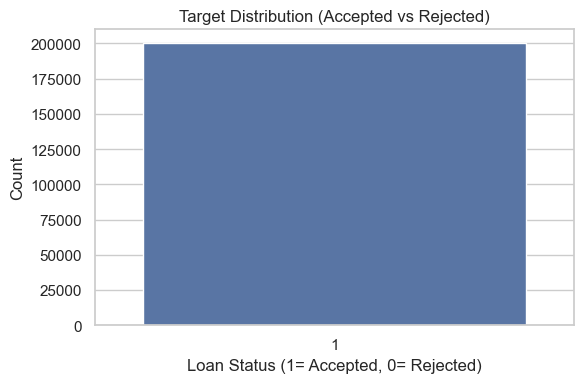

Value counts:


In [7]:
#Target Variable Balance 

TARGET_COL = "loan_status" 

if TARGET_COL in df.columns: 
    plt.figure(figsize = (6,4)) 
    counts = df[TARGET_COL].value_counts() 
    sns.barplot(x = counts.index.astype(str), y = counts.values) 
    plt.title("Target Distribution (Accepted vs Rejected)") 
    plt.xlabel("Loan Status (1= Accepted, 0= Rejected)") 
    plt.ylabel("Count") 
    plt.tight_layout() 
    plt.show()

    print("Value counts:") 
    counts 
else: 
    print("Target column not found in dataframe.") 

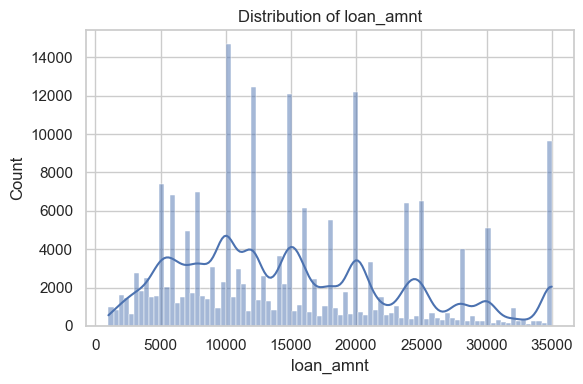

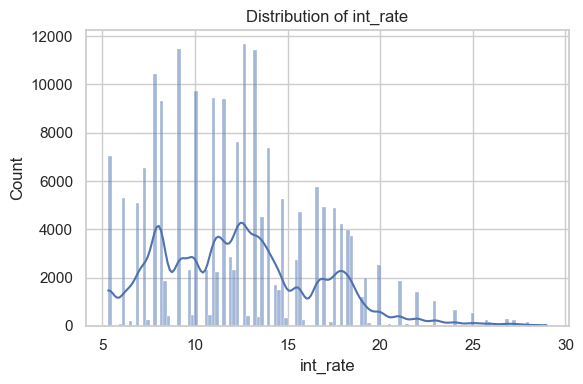

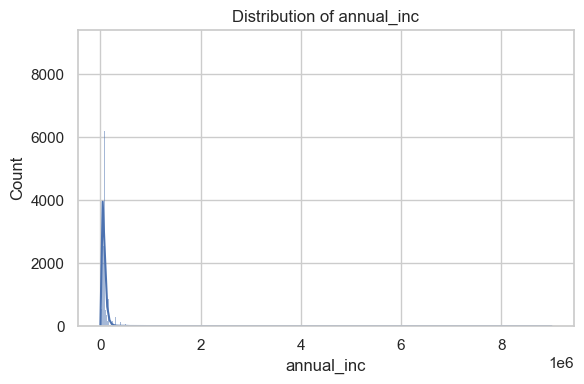

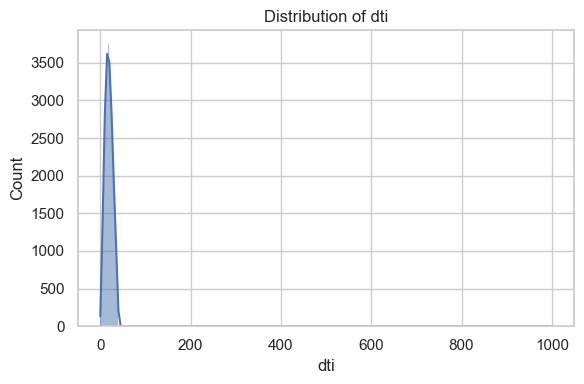

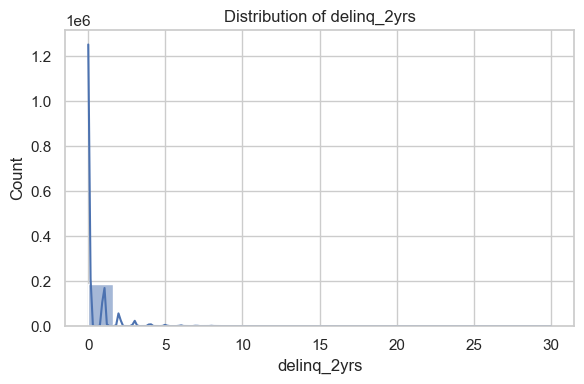

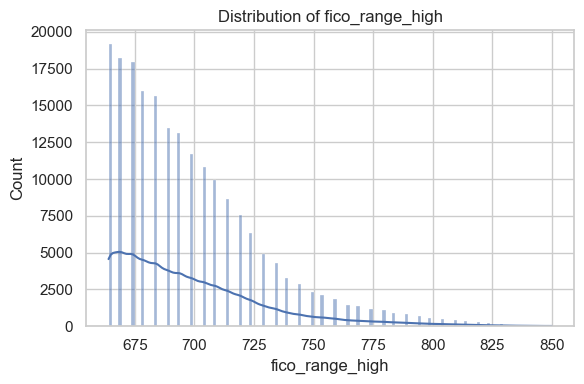

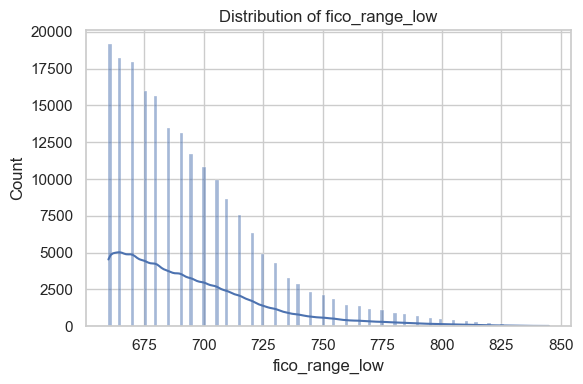

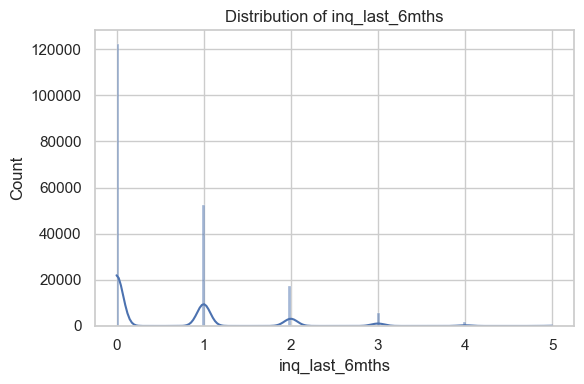

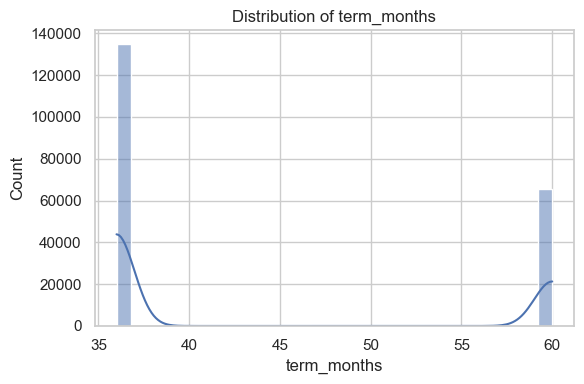

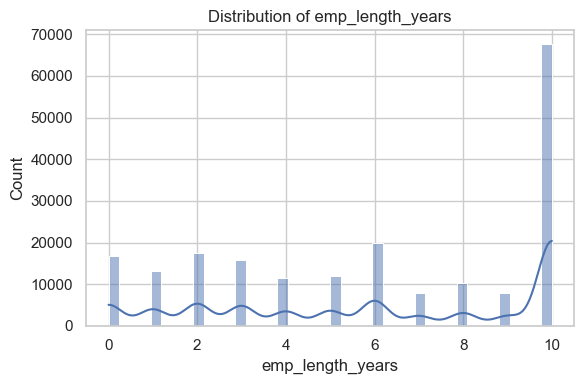

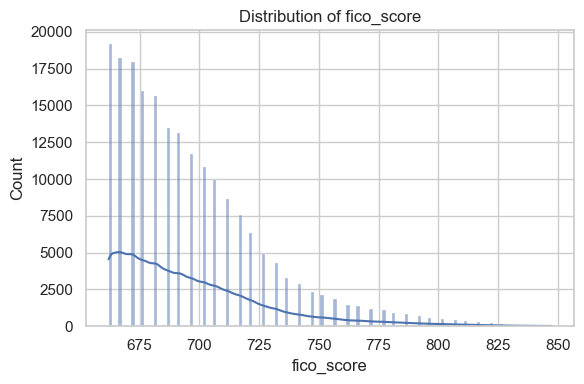

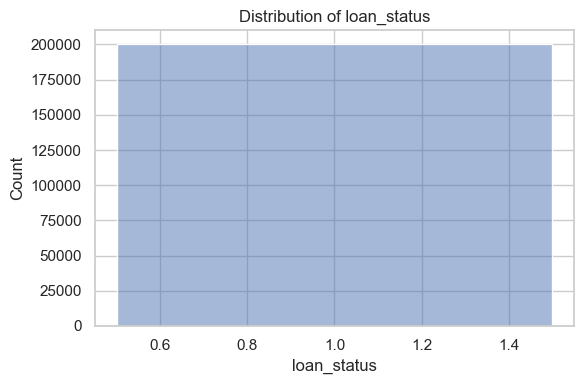

In [8]:
#Univariate Numeric Distributions 

for col in numeric_cols[:15]: #limit to first 15 columns for speed 
    plt.figure(figsize = (6,4)) 
    sns.histplot(df[col], kde = True) 
    plt.title(f"Distribution of {col}") 
    plt.tight_layout()
    plt.show()

In [9]:
#Top Categories of Encoded Features 

encoded_groups = {} 

for col in df.columns: 
    for base in ["term", "emp_length", "home_ownership", "purpose", "addr_state", "application_type"]: 
        if col.startswith(base+"_"): 
            encoded_groups.setdefault(base, []).append(col) 

encoded_groups

{'term': ['term_months', 'term_36 months', 'term_60 months'],
 'emp_length': ['emp_length_years',
  'emp_length_1 year',
  'emp_length_10+ years',
  'emp_length_2 years',
  'emp_length_3 years',
  'emp_length_4 years',
  'emp_length_5 years',
  'emp_length_6 years',
  'emp_length_7 years',
  'emp_length_8 years',
  'emp_length_9 years',
  'emp_length_< 1 year'],
 'home_ownership': ['home_ownership_any',
  'home_ownership_mortgage',
  'home_ownership_own',
  'home_ownership_rent'],
 'purpose': ['purpose_car',
  'purpose_credit_card',
  'purpose_debt_consolidation',
  'purpose_educational',
  'purpose_home_improvement',
  'purpose_house',
  'purpose_major_purchase',
  'purpose_medical',
  'purpose_moving',
  'purpose_other',
  'purpose_renewable_energy',
  'purpose_small_business',
  'purpose_vacation',
  'purpose_wedding'],
 'addr_state': ['addr_state_ak',
  'addr_state_al',
  'addr_state_ar',
  'addr_state_az',
  'addr_state_ca',
  'addr_state_co',
  'addr_state_ct',
  'addr_state_dc',

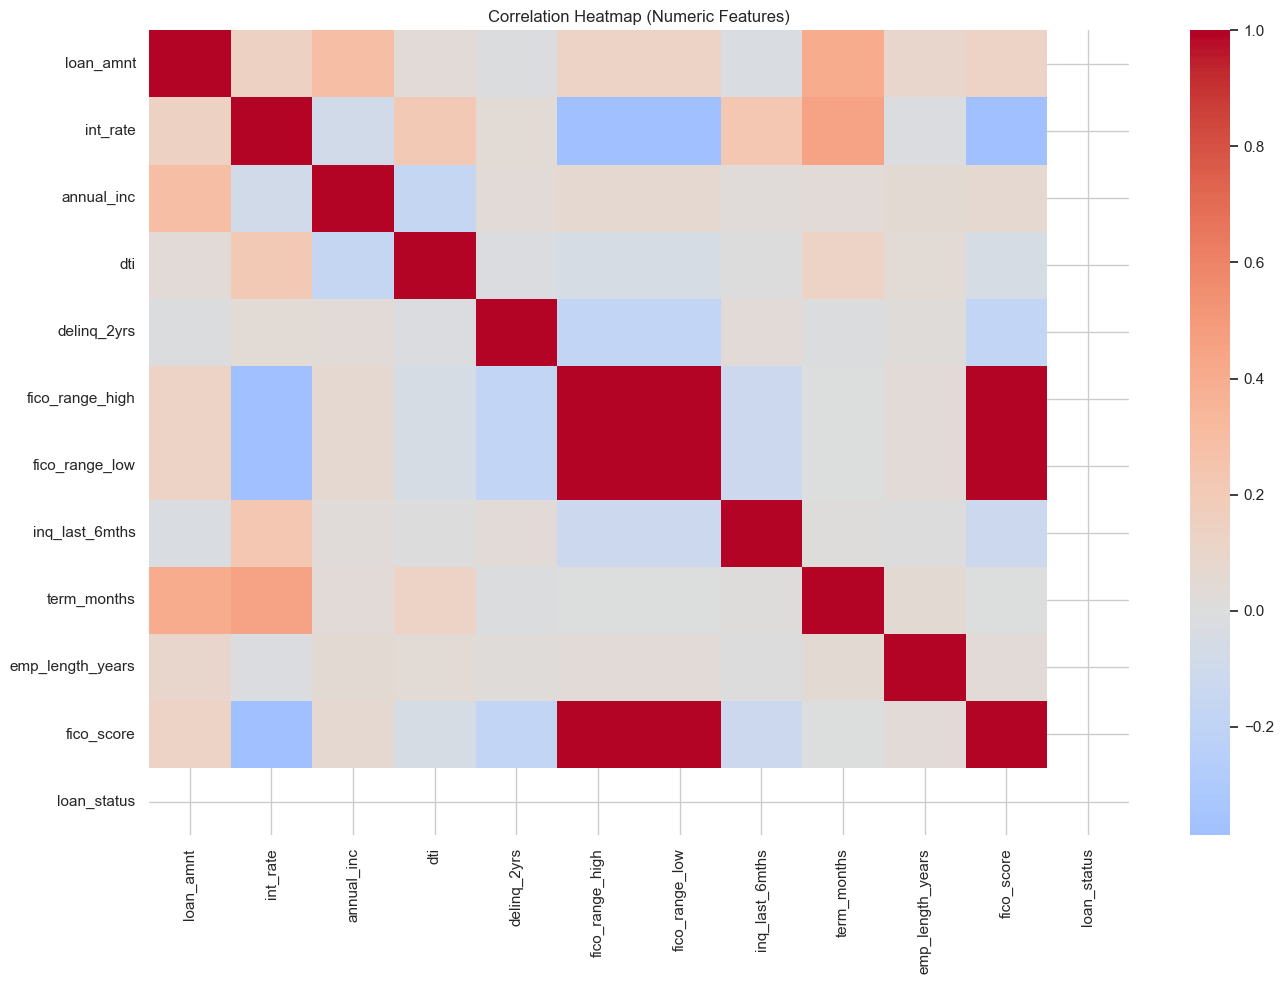

In [10]:
sample_df = df.sample(n = 50_000, random_state = 42) 

corr = sample_df[numeric_cols].corr(numeric_only = True) 

plt.figure(figsize = (14,10)) 
sns.heatmap(corr, cmap = "coolwarm", center = 0) 
plt.title("Correlation Heatmap (Numeric Features)") 
plt.tight_layout()
plt.show()

In [11]:
outlier_summary = [] 

for col in numeric_cols: 
    q1 = df[col].quantile(0.25) 
    q3 = df[col].quantile(0.75) 
    iqr = q3 - q1 
    lower = q1 - 1.5 * iqr 
    upper = q3 + 1.5 * iqr 

    outliers = ((df[col] < lower) | (df[col] > upper)).sum()


    outlier_summary.append({
    "column" : col, 
    "iqr" : iqr, 
    "lower_bound" : lower, 
    "upper_bound" : upper, 
    "outlier_count" : outliers, 
    "outlier_pct" : (outliers / len(df)) * 100, 
    }) 

outlier_df = pd.DataFrame(outlier_summary) 
outlier_df.sort_values("outlier_pct", ascending = False).head(20) 

,column,iqr,lower_bound,upper_bound,outlier_count,outlier_pct
4,delinq_2yrs,0.000,0.000,0.000,41456,20.728
2,annual_inc,"45,824.500","-21,161.250","162,136.750",9115,4.558
7,inq_last_6mths,1.000,-1.500,2.500,8063,4.031
5,fico_range_high,40.000,614.000,774.000,5941,2.970
10,fico_score,40.000,612.000,772.000,5941,2.970
6,fico_range_low,40.000,610.000,770.000,5941,2.970
1,int_rate,5.480,0.950,22.870,3647,1.824
3,dti,12.870,-6.765,44.715,61,0.030
0,loan_amnt,"11,500.000","-8,750.000","37,250.000",0,0.000
8,term_months,24.000,0.000,96.000,0,0.000


In [12]:
OUTPUT_DIR = Path("artifacts/eda")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

missing_df.to_csv(OUTPUT_DIR / "missing_values(engineered).csv")
outlier_df.to_csv(OUTPUT_DIR / "outlier_summary(engineered).csv")

print("Saved:")
print(OUTPUT_DIR / "missing_values(engineered).csv")
print(OUTPUT_DIR / "outlier_summary(engineered).csv")


Saved:
artifacts\eda\missing_values(engineered).csv
artifacts\eda\outlier_summary(engineered).csv
